<a href="https://colab.research.google.com/github/lucasgneccoh/gedlib/blob/master/gedlib_compression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guided example
In this notebook you will see how to install and run `GEDLIB` for compressing collections of graphs in `gxl` format

### Install and run
To install and run the compression part of `GEDLIB` you have to 
  1. Clone the repository
  2. Install `GEDLIB`  
  3. Go to the compression folder and run the `setup.py` to ready up all the folders
  4. Compile the test code
  5. Run it using a bash script to simplify or directly from the terminal


In [49]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import numpy as np

In [5]:
# 1. Clone the repository
# It will be in /content/gedlib
%cd /content
if os.path.isdir('gedlib'):
  %rm -r gedlib
!git clone https://github.com/lucasgneccoh/gedlib.git

/content
Cloning into 'gedlib'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 194396 (delta 6), reused 0 (delta 0), pack-reused 194378
Receiving objects: 100% (194396/194396), 535.14 MiB | 20.81 MiB/s, done.
Resolving deltas: 100% (132404/132404), done.
Checking out files: 100% (155594/155594), done.


In [6]:
%cd /content/gedlib

/content/gedlib


In [7]:
# 2. Install GEDLIB
# Comment the %%capture line if you want to see the text output
%%capture
!python install.py --lib gxl

In [9]:
# 3. Go the gedlib/compression and run setup.py
%cd /content/gedlib/compression
!python setup.py

/content/gedlib/compression
Python 3.7.10
acyclic...done
AIDS...done
mao...done
pah...done
Mutagenicity...done
msts_no_w...done
msts_int_w...done
msts_float_w...done
Original files copied
Launching compression
This may take some time (2 min max)
Compressing...
acyclic
AIDS
mao
pah
Mutagenicity
msts_float_w
msts_int_w
msts_no_w
Extracting...
rm: cannot remove 'extract': No such file or directory
acyclic
AIDS
mao
pah
Mutagenicity
msts_float_w
msts_int_w
msts_no_w
Done compressing and timing
Original collections copied and compressed. See data/orig_datasets_to_tar/tar_times.txt for the times taken for compression and decompression using tar.bz


In [10]:
# 4. Compile the test code
%cd /content/gedlib/compression/build
!cmake ..
!make

/content/gedlib/compression/build
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Building GEDLIB with build type 'Release', as none was specified.
-- Configuring done
-- Generating done
-- Build files have been written to: /content/gedlib/compression/build
Scanning dependencies of target abc
[ 50%] Building CXX object CMakeFiles/abc.dir/tests/compression_test.cpp.o
[100%] Linking CXX executable ../bin/abc
[100%] Built target abc


In [11]:
# 5. Run the program

# Example from the terminal
# Here I get statistics from datasets. Results will be in two files
# in the folder gedlib/compression/data/output
# file stats_datasets.csv and stats_attributes.csv 

!../bin/abc dataset_stats 0 acyclic:mao:pah:AIDS ../data/output

Start: acyclic ... Done (0.207623 s)
Start: mao ... Done (0.175668 s)
Start: pah ... Done (0.311672 s)
Start: AIDS ... Done (7.1116 s)


In [12]:
# Look at the files and some information
stats_datasets = pd.read_csv('../data/output/stats_datasets.csv')
stats_attributes = pd.read_csv('../data/output/stats_attributes.csv')
print("########### Datasets ###########",\
      stats_datasets.iloc[:,0:5],"-"*50,\
      "########### Attributes ###########", \
      stats_attributes.iloc[:,0:7],sep='\n')

########### Datasets ###########
   dataset  num_graphs  min_num_nodes  max_num_nodes  mean_num_nodes
0  acyclic         183              3             11        8.153005
1      mao          68             11             27       18.382353
2      pah          94             10             28       20.702128
3     AIDS        1500              2             95       15.720667
--------------------------------------------------
########### Attributes ###########
    dataset  type_attr attr_name  ...  min_freq  max_freq    mean_freq
0   acyclic  node_attr      chem  ...        93      1242   497.000000
1   acyclic  edge_attr   valence  ...      1308      1308  1308.000000
2       mao  node_attr      chem  ...        47      1067   416.333333
3       mao  edge_attr   valence  ...        42      1121   333.500000
4       pah  node_attr      chem  ...      1945      1945  1945.000000
5       pah  edge_attr   valence  ...      2295      2295  2295.000000
6      AIDS  node_attr    charge  ...  

In [ ]:
'''
The compression command takes a lot of arguments, so running it from the terminal
can be unpractical.
To simplify this I created some bash files. See gedlib/compression/util_files/run.sh
for an example. There you can define the behaviour of the test program, the datasets,
number of trials, paths for the output, etc.

I will copy one of the files, change some parameters and run a small test

Results will be in gedlib/compression/data/output/colab_test.csv

'''
datasets = ['acyclic', 'mao']
k_values = [20,40,60,80,100]
num_trials = 2


with open('../util_files/line_small.sh') as f:
  content = ''.join(f.readlines())
  # Change output file name
  content = re.sub(r'output_results_file=.+\n',\
                   'output_results_file="colab_test.csv"\n', \
                   content)
  # Change datasets to use (to make it fast)
  content = re.sub(r'datasets_names=.+\n',\
                   f'datasets_names="{":".join(datasets)}"\n', \
                   content)
  # Change number of trials. It will be noisy, but this is just a small test
  content = re.sub(r'num_trials=.+\n',\
                   f'num_trials="{num_trials}"\n', \
                   content)
  # Change the density paramater (also to make it fast)
  content = re.sub(r'graph_sample_sizes=.+\n',\
                   f'graph_sample_sizes="{":".join(k_values)}"\n', \
                   content)
with open('./run_colab.sh','w') as f_out:
  f_out.write(content)

if os.path.isfile('../data/output/colab_test.csv'):
  os.remove('../data/output/colab_test.csv')
!bash run_colab.sh

### Looking at the results

In [27]:
# Now we look at the results
# 'file_preffix' is the name of the dataset
results = pd.read_csv('../data/output/colab_test.csv')
results.head()

,file_preffix,edit_costs,relaxed_compression,binary_mode,ged_method,b_ni,b_na,b_ei,b_ea,graph_sample_size,info_file_size,cost_arborescence,k_complexity_a,k_complexity_b,load_time,initialization_time,gedlib_runtime_initial,spanning_arb_runtime,refinement_size,cost_arborescence_refined,gedlib_runtime_refinement,refine_arb_runtime,final_time,num_nodes,num_leafs,avg_degree,min_degree,max_degree,root_degree,avg_depth,max_depth,comp_time,decomp_time,write_time,tar_compressed_size,tar_time
0,acyclic,traditional,True,True,branch_uniform,1,1,1,1,36,413,3072,8647,5602,0.201985,0.027939,2.749506,0.001108,1,2787,1.489472,0.000849,0.030539,184,70,1.605263,1,6,1,15.934783,26,4.509472,0.056894,0.014110,3376,0.028995
1,acyclic,traditional,True,True,branch_uniform,1,1,1,1,36,413,3027,8647,5602,0.193066,0.032021,2.827189,0.000906,1,2733,1.797578,0.000795,0.034996,184,63,1.512397,1,4,1,25.733696,51,4.893672,0.055337,0.019756,3399,0.030215
2,acyclic,traditional,True,True,branch_uniform,1,1,1,1,73,413,2752,8647,5602,0.194038,0.028494,5.617842,0.001055,1,2556,1.572281,0.000948,0.030683,184,67,1.564103,1,5,1,19.179348,32,7.459582,0.059460,0.020099,3260,0.030965
3,acyclic,traditional,True,True,branch_uniform,1,1,1,1,73,413,2687,8647,5602,0.198665,0.029512,5.524544,0.001401,1,2512,1.337553,0.000996,0.030425,184,66,1.550847,1,6,1,19.211957,34,7.136954,0.058763,0.014061,3231,0.027969
4,acyclic,traditional,True,True,branch_uniform,1,1,1,1,110,413,2535,8647,5602,0.200597,0.029515,8.438324,0.001155,1,2400,1.650103,0.001040,0.037740,184,61,1.487805,1,4,1,20.940217,38,10.379951,0.060693,0.014144,3207,0.029798


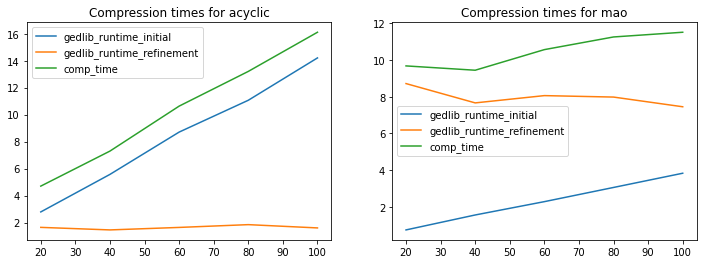

In [78]:
# Let's make a plot of the average compression time taken for the different datasets
# For some datasets the refinement time is dominant and can have a high variance
results['k'] = np.ceil(results['graph_sample_size'].apply(int)*10/(results['num_nodes']))*10
keys = ['file_preffix', 'k']
to_plot = ['gedlib_runtime_initial',\
        'gedlib_runtime_refinement', 'comp_time'] 
keep = keys + to_plot
df = results.loc[:,keep].groupby(by=['file_preffix', 'k']).mean().reset_index()

N = len(datasets)
fig, ax = plt.subplots(ncols=N, figsize=(6*N,4))
for i, d in enumerate(datasets):
  ax[i].set_title(f'Compression times for {d}')
  aux = df.loc[df['file_preffix'] ==d,:]  
  for col in to_plot:
    ax[i].plot(aux['k'], aux[col], label=col)
  ax[i].legend()

### Checking that the generated collections are isomorphic to the original ones
When decompressing the compressed graphs we obtain isomorphic (not equal) graphs. Here we check they are indeed isomorphic one by one.

In [86]:
cmd = 'python ../util_files/check_iso.py --datasets ' + ' '.join(datasets)
!eval $cmd

Sizes: Orig ->  183 , compressed ->  183
../../data/collections/acyclic.xml
 -- All good --
Sizes: Orig ->  68 , compressed ->  68
../../data/collections/mao.xml
 -- All good --


### Comparing with `tar.bz`
We wanted to compare the size of the compressed collections to the sizes one would obtain by just using `tar.bz` on the original collection. The `C++` code can get these values. Here is an example of how to do it, and also an example using `python` 

In [109]:
def folder_size(path):
  total = 0
  for f in os.listdir(path):
    total += os.path.getsize(os.path.join(path,f))
  return total

In [110]:
# Using python is easier using the os library

# Collections were already copied and compressed by the setup.py script
base = '../data/orig_datasets_to_tar/'
abc = '../data/output/'
for d in datasets:
  print(f'##### Dataset: {d}')
  print('Orig:\t\t{:,d} bytes'.format(folder_size(base + d)))
  print('Orig + tar:\t{:,d} bytes'.format(os.path.getsize(base + 'compressed/' + d+'.tar.bz')))
  print('ABC only:\t{:,d} bytes'.format(folder_size(abc + d + '/encoded_bin')))
  print('ABC + tar:\t{:,d} bytes'.format(os.path.getsize(abc + d + '/encoded_bin.tar.bz')))

##### Dataset: acyclic
Orig:		241,640 bytes
Orig + tar:	4,408 bytes
ABC only:	2,698 bytes
ABC + tar:	3,072 bytes
##### Dataset: mao
Orig:		195,554 bytes
Orig + tar:	2,350 bytes
ABC only:	1,266 bytes
ABC + tar:	1,269 bytes


In [99]:
# Using the compression module from GEDLIB
# It will get the size of the original collections and the tar.bz files
!../bin/abc gxl_sizes 0 acyclic:mao ../data/output ../data/orig_datasets_to_tar/compressed

In [136]:
# Get the output file
gxl_sizes = pd.read_csv('../data/output/original_gxl_sizes.csv')

# Cross it with the results we had using ABC compression method
abc_results = results.loc[results['k']==100,['file_preffix','cost_arborescence_refined', 'tar_compressed_size', 'info_file_size']]\
  .rename(columns={'file_preffix':'dataset'}).drop_duplicates('dataset',keep='last').set_index('dataset')
  
abc_results['abc_only'] = abc_results['cost_arborescence_refined'] + abc_results['info_file_size']
abc_results.drop(columns=['cost_arborescence_refined', 'info_file_size'])
df = gxl_sizes.set_index('dataset').join(abc_results, on='dataset')

for d in datasets:
  print(f'##### Dataset: {d}')
  print('Orig:\t\t{:,d} bytes'.format(df.loc[d,'total_size']))
  print('Orig + tar:\t{:,d} bytes'.format(df.loc[d,'tar_size']))

  print('ABC only:\t{:,d} bytes'.format(df.loc[d,'abc_only']))
  print('ABC + tar:\t{:,d} bytes'.format(df.loc[d,'tar_compressed_size']))

##### Dataset: acyclic
Orig:		241,640 bytes
Orig + tar:	4,408 bytes
ABC only:	2,698 bytes
ABC + tar:	3,072 bytes
##### Dataset: mao
Orig:		195,554 bytes
Orig + tar:	2,350 bytes
ABC only:	1,266 bytes
ABC + tar:	1,269 bytes
